.pandas is a software library written for the Python programming language for data manipulation and analysis.
.NumPymis a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.
.Matplotlib is a plotting library for Python. It is used along with NumPy to provide an environment that is an effective open source alternative for MatLab.
.matplotlib.pyplot is a collection of command style functions that make matplotlib work like MATLAB.
.Seaborn is a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics.

In [3]:
import pandas as pd
import numpy  as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.style.use('seaborn')


# Problem definition

# preparing data

In [5]:
total_data=pd.read_csv("../../data/Processed/New York_Weather_cyclical_taxi.csv", parse_dates=['datetime'])
total_data.sample(5)

,datetime,temperature,humidity,pressure,wind_speed,wind_direction,rides,date,hour,month,day,year,hour_sin,hour_cos,day_sin,day_cos,month_sin,month_cos
537,2015-01-23 09:00:00,-8.505000,87.0,1025.0,1.0,299.0,52,2015-01-23,9,1,23,2015,6.310879e-01,-0.775711,0.385663,0.922640,0.500000,8.660254e-01
7223,2015-10-28 23:00:00,17.980000,82.0,1009.0,5.0,160.0,32,2015-10-28,23,10,28,2015,-2.449294e-16,1.000000,0.463550,0.886071,-0.866025,5.000000e-01
6691,2015-10-06 19:00:00,21.070000,37.0,1015.0,4.0,310.0,26,2015-10-06,19,10,6,2015,-8.878852e-01,0.460065,0.103102,0.994671,-0.866025,5.000000e-01
1691,2015-03-12 11:00:00,0.792000,89.0,1038.0,4.0,310.0,45,2015-03-12,11,3,12,2015,1.361666e-01,-0.990686,0.205104,0.978740,1.000000,6.123234e-17
860,2015-02-05 20:00:00,-5.817316,76.0,1021.0,5.0,327.0,45,2015-02-05,20,2,5,2015,-7.308360e-01,0.682553,0.085965,0.996298,0.866025,5.000000e-01


For each city we have timeseries in a column. We are going to chose New York as our chosen city and  our chosen features. 

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import utils
import pandas as pd
import numpy as np
from itertools import cycle, islice
import matplotlib.pyplot as plt
from pandas.tools.plotting import parallel_coordinates

%matplotlib inline

# k-Means Clustering 

I will try to perform k-means clustering using.

I will use cluster analysis to generate a big picture model of the weather and number of taxi rides in NYC. In this dataset.

# Select Features of Interest for Clustering 

In [8]:
features=['humidity','pressure','wind_speed','wind_direction','temperature','rides']

In [9]:
total_data.shape

(8760, 18)

In [10]:
total_data = total_data[features]

In [11]:
total_data.head()

,humidity,pressure,wind_speed,wind_direction,temperature,rides
0,59.0,1022.0,2.0,249.0,-5.100,46
1,59.0,1022.0,2.0,249.0,-5.100,46
2,58.0,1021.0,2.0,246.0,-5.964,46
3,58.0,1021.0,2.0,246.0,-5.964,46
4,58.0,1021.0,2.0,246.0,-5.964,46


In [12]:
total_data.columns

Index(['humidity', 'pressure', 'wind_speed', 'wind_direction', 'temperature',
       'rides'],
      dtype='object')

In [13]:
total_data.head()

,humidity,pressure,wind_speed,wind_direction,temperature,rides
0,59.0,1022.0,2.0,249.0,-5.100,46
1,59.0,1022.0,2.0,249.0,-5.100,46
2,58.0,1021.0,2.0,246.0,-5.964,46
3,58.0,1021.0,2.0,246.0,-5.964,46
4,58.0,1021.0,2.0,246.0,-5.964,46


Scale the Features using StandardScaler 

In [14]:
X = StandardScaler().fit_transform(total_data)
X

array([[-0.63191976,  0.21586309, -0.45144089,  0.45797614, -1.49667141,
         1.22183269],
       [-0.63191976,  0.21586309, -0.45144089,  0.45797614, -1.49667141,
         1.22183269],
       [-0.68649226,  0.10864146, -0.45144089,  0.42780799, -1.57321824,
         1.22183269],
       ..., 
       [-0.35905721, -0.32024507,  1.41336054,  1.04122701, -0.34697782,
        -0.22430431],
       [-0.52277474, -0.21302343,  1.41336054,  0.97083466, -0.4060563 ,
        -0.22430431],
       [ 0.13209538,  0.21586309,  0.79176006,  0.96077861, -0.49165311,
         0.03862969]])

deploying K-means 

In [16]:
kmeans = KMeans(n_clusters=12)
model = kmeans.fit(X)
print("model\n", model)

model
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=12, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


We achived to 12 cluster. Now the main question is that " What are the centers of 12 clusters ? "
we can do it simply using the predefined function. 

In [17]:
centers = model.cluster_centers_
centers

array([[-0.80057448,  0.95412736, -0.08028018,  0.44724079, -0.0494205 ,
        -0.2848838 ],
       [ 0.3798739 , -0.8549813 ,  0.01353584,  0.18467132,  0.81191045,
        -0.42124602],
       [ 0.86060199, -0.33682868, -0.50779934, -1.50554126, -0.29672614,
         0.55485678],
       [ 0.7273969 ,  1.74056226, -0.49412121, -0.772987  , -0.85753819,
         0.90566381],
       [ 0.22700409,  0.15450766, -0.62057202,  0.5690017 , -1.79561594,
         1.70971724],
       [-1.36139722, -0.38448013,  0.03221537,  0.4494262 ,  1.16121426,
        -1.44424604],
       [-1.01746238, -0.68184677,  2.09535944,  0.7829046 ,  0.21319316,
        -0.69721294],
       [ 0.37990467, -1.29658257,  0.05229123,  0.68569247, -0.96407875,
         0.82270833],
       [-0.73538628,  0.31815833, -0.3254408 , -1.3256273 ,  0.61496121,
        -0.76527326],
       [ 0.87824596, -0.0666635 , -0.70286853,  0.36602867,  0.31227149,
         0.15347171],
       [ 0.25130341,  0.17505297,  1.67493237, -1.

In [18]:
# Function that creates a DataFrame with a column for Cluster Number

def pd_centers(featuresUsed, centers):
	colNames = list(featuresUsed)
	colNames.append('prediction')

	# Zip with a column called 'prediction' (index)
	Z = [np.append(A, index) for index, A in enumerate(centers)]

	# Convert to pandas data frame for plotting
	P = pd.DataFrame(Z, columns=colNames)
	P['prediction'] = P['prediction'].astype(int)
	return P

In [19]:
# Function that creates Parallel Plots

def parallel_plot(data):
	my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(data)))
	plt.figure(figsize=(15,8)).gca().axes.set_ylim([-3,+3])
	parallel_coordinates(data, 'prediction', color = my_colors, marker='o')

In [20]:
total_data.head()

,humidity,pressure,wind_speed,wind_direction,temperature,rides
0,59.0,1022.0,2.0,249.0,-5.100,46
1,59.0,1022.0,2.0,249.0,-5.100,46
2,58.0,1021.0,2.0,246.0,-5.964,46
3,58.0,1021.0,2.0,246.0,-5.964,46
4,58.0,1021.0,2.0,246.0,-5.964,46


In [21]:
P = pd_centers(features, centers)
P

,humidity,pressure,wind_speed,wind_direction,temperature,rides,prediction
0,-0.800574,0.954127,-0.080280,0.447241,-0.049420,-0.284884,0
1,0.379874,-0.854981,0.013536,0.184671,0.811910,-0.421246,1
2,0.860602,-0.336829,-0.507799,-1.505541,-0.296726,0.554857,2
3,0.727397,1.740562,-0.494121,-0.772987,-0.857538,0.905664,3
4,0.227004,0.154508,-0.620572,0.569002,-1.795616,1.709717,4
5,-1.361397,-0.384480,0.032215,0.449426,1.161214,-1.444246,5
6,-1.017462,-0.681847,2.095359,0.782905,0.213193,-0.697213,6
7,0.379905,-1.296583,0.052291,0.685692,-0.964079,0.822708,7
8,-0.735386,0.318158,-0.325441,-1.325627,0.614961,-0.765273,8
9,0.878246,-0.066664,-0.702869,0.366029,0.312271,0.153472,9


here we can plot a cold day.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: 'pandas.tools.plotting.parallel_coordinates' is deprecated, import 'pandas.plotting.parallel_coordinates' instead.
  


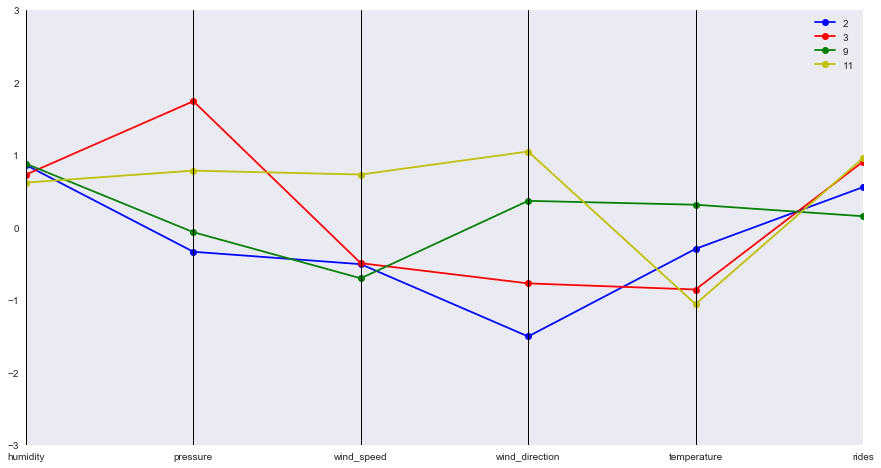

In [22]:
parallel_plot(P[(P['humidity'] > 0.5) & (P['temperature'] < 0.5)])

In [23]:
we can plot a cold and windy day

SyntaxError: invalid syntax (<ipython-input-23-f523bc1b911b>, line 1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: 'pandas.tools.plotting.parallel_coordinates' is deprecated, import 'pandas.plotting.parallel_coordinates' instead.
  


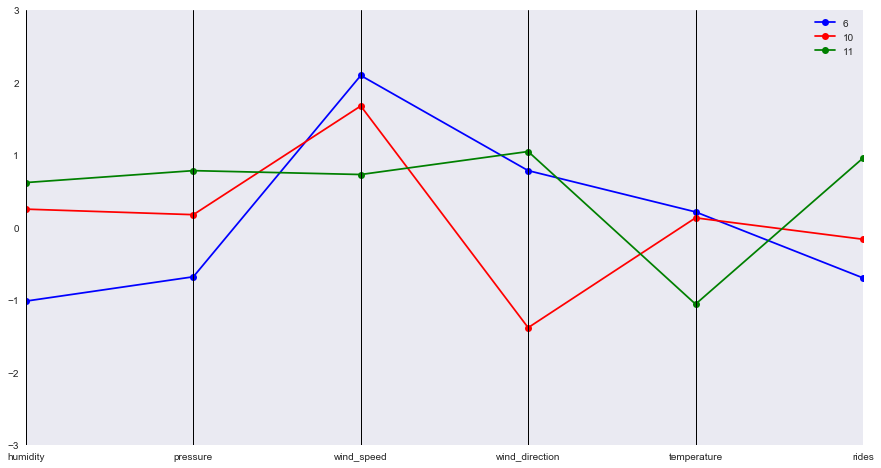

In [24]:
parallel_plot(P[(P['wind_speed'] > 0.5) & (P['temperature'] < 0.5)])